In [1]:
setwd('c:/rdata')

In [2]:
nrow(iris)

[1] 150

In [4]:
150*0.7

[1] 105

In [5]:
iris_train = iris[1:105,]

In [6]:
iris_test = iris[106:150,]

In [7]:
nrow(iris_train)
nrow(iris_test)

[1] 105

[1] 45

In [8]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [10]:
idx = sample(1:nrow(iris), size = nrow(iris)*0.7, replace =  F)
idx

[1] 133  74  75  66  93 150 148   7  34 120  32   3 110  97  63 139  84  27
 [19] 131  18  46  10  85 101  16   8 138 125  45 100 149  60  83  20 103  65
 [37] 107  88 135  64  22  87 132  54 102 111 115  95 141 117 130  41  98  68
 [55]  79  86 126  80  37  82  24 143 128  38  72  58  77 109  12  94 119 122
 [73]  81  50 127  89 113  43 121  13 134 104 147  33  96  90  31 140  11 118
 [91]  73  51   2 129  39  70  71  78 144  49 105  44  40 145  52

In [11]:
iris_train = iris[idx,]

In [12]:
iris_test = iris[-idx,]

In [13]:
nrow(iris_train)
nrow(iris_test)

[1] 105

[1] 45

In [14]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [15]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [16]:
table(iris_train$Species)


    setosa versicolor  virginica 
        29         37         39 

In [17]:
table(iris_test$Species)


    setosa versicolor  virginica 
        21         13         11 

In [30]:
install.packages('caret')

also installing the dependencies 'tidyr', 'ModelMetrics', 'recipes', 'pROC'



package 'tidyr' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15\AppData\Local\Temp\Rtmp6PdMLG\downloaded_packages


In [32]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [37]:
train.idx = createDataPartition(iris$Species, p=0.7, list = F)

In [111]:
iris_train = iris[train.idx,]

In [39]:
table(iris_train$Species)


    setosa versicolor  virginica 
        35         35         35 

In [112]:
iris_test = iris[-train.idx,]

In [41]:
table(iris_test$Species)


    setosa versicolor  virginica 
        15         15         15 

In [50]:
install.packages('e1071')

Warning message:
"package 'e1071' is in use and will not be installed"

# naive Bayes Model method

In [48]:
library(e1071)

In [49]:
naive.result = naiveBayes(iris_train, iris_train$Species, laplace = 1)

In [54]:
naive.pred = predict(naive.result, iris_test, type = 'class')

In [55]:
table(naive.pred, iris_test$Species)

            
naive.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [62]:
confusionMatrix(naive.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# Logistic Regression Method

In [63]:
library(nnet)

In [64]:
multi.result = multinom(Species~.,iris_train)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 11.948022
iter  20 value 6.173074
iter  30 value 6.036251
iter  40 value 5.888685
iter  50 value 5.866781
iter  60 value 5.859691
iter  70 value 5.857429
iter  80 value 5.856311
final  value 5.856309 
converged


In [65]:
multi.pred = predict(multi.result, iris_test)

In [66]:
table(multi.pred, iris_test$Species)

            
multi.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [67]:
confusionMatrix(multi.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# Decision Tree model method

In [68]:
library(rpart)

In [69]:
rpart.result = rpart(Species~.,data=iris_train)

In [70]:
rpart.pred = predict(rpart.result, iris_test, type = 'class')

In [71]:
table(rpart.pred, iris_test$Species)

            
rpart.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [72]:
confusionMatrix(rpart.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

In [73]:
install.packages('rpart.plot')

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15\AppData\Local\Temp\Rtmp6PdMLG\downloaded_packages


In [75]:
library(rpart.plot)

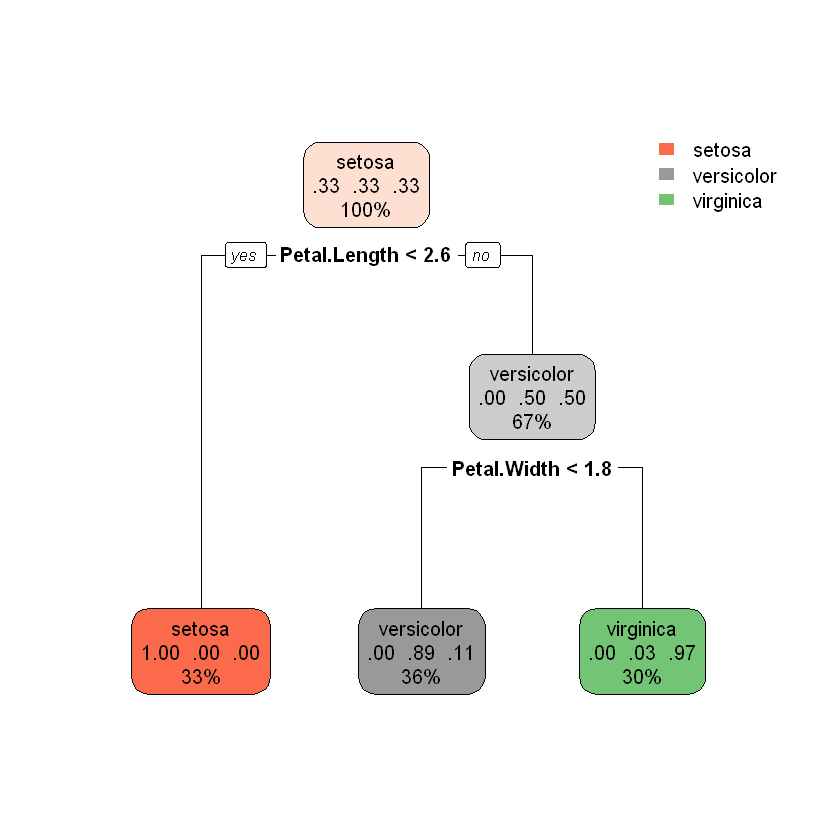

In [76]:
rpart.plot(rpart.result)

# ANN Model Method

In [77]:
library(nnet)

In [79]:
iris_train_scale = as.data.frame(sapply(iris_train[, -5], scale))

In [81]:
head(iris_train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [83]:
iris_test_scale = as.data.frame(sapply(iris_test[,-5], scale))

In [84]:
iris_test_scale

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.93177190,0.81166460,-1.26389962,-1.26464235
-1.17205691,-0.01844692,-1.20968086,-1.39427539
-1.89291196,-0.22597480,-1.42655591,-1.39427539
-0.09077434,1.84930400,-1.37233715,-1.26464235
-0.93177190,0.81166460,-1.26389962,-1.13500930
-0.21091685,1.43424824,-1.10124333,-1.13500930
-1.53248444,1.01919248,-1.48077468,-1.26464235
-0.81162939,0.81166460,-1.20968086,-1.26464235
-0.45120186,2.26435976,-1.26389962,-1.26464235
-0.93177190,0.60413672,-1.20968086,-1.26464235


In [87]:
iris_train_scale$Species = iris_train$Species

In [88]:
iris_test_scale$Species = iris_test$Species

In [89]:
head(iris_train_scale)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-1.1201203,-0.0848916,-1.362375,-1.325235,setosa
-1.3611297,0.3969256,-1.419871,-1.325235,setosa
-1.4816345,0.1560170,-1.304879,-1.325235,setosa
-0.9996155,1.3605599,-1.362375,-1.325235,setosa
-0.5175966,2.0832857,-1.189888,-1.062688,setosa
-1.4816345,0.8787428,-1.362375,-1.193962,setosa


In [90]:
head(iris_test_scale)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.93177190,0.81166460,-1.263900,-1.264642,setosa
-1.17205691,-0.01844692,-1.209681,-1.394275,setosa
-1.89291196,-0.22597480,-1.426556,-1.394275,setosa
-0.09077434,1.84930400,-1.372337,-1.264642,setosa
-0.93177190,0.81166460,-1.263900,-1.135009,setosa
-0.21091685,1.43424824,-1.101243,-1.135009,setosa


In [91]:
nnet.result = nnet(Species~.,iris_train_scale, size = 3)

# weights:  27
initial  value 140.056175 
iter  10 value 9.489417
iter  20 value 5.568767
iter  30 value 5.196210
iter  40 value 4.944893
iter  50 value 4.747177
iter  60 value 4.341064
iter  70 value 4.294809
iter  80 value 4.203796
iter  90 value 4.193121
iter 100 value 4.164955
final  value 4.164955 
stopped after 100 iterations


In [97]:
nnet.pred = predict(nnet.result, iris_test_scale, type = 'class')

In [100]:
table(nnet.pred, iris_test$Species)

            
nnet.pred    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [98]:
table(nnet.pred, iris_test_scale$Species)

            
nnet.pred    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [102]:
confusionMatrix(nnet.pred, iris_test$Species)

ERROR: Error: `data` and `reference` should be factors with the same levels.


# SVM model method

In [103]:
install.packages('kernlab')
library(kernlab)

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15\AppData\Local\Temp\Rtmp6PdMLG\downloaded_packages



Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [106]:
svm.result = ksvm(Species~.,data=iris_train, kernel = 'rbfdot')

In [108]:
svm.pred = predict(svm.result, iris_test, type = 'response')

In [113]:
table(svm.pred, iris_test$Species)

            
svm.pred     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [114]:
confusionMatrix(svm.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# Random Forest Method

In [119]:
install.packages('randomForest')

Warning message:
"package 'randomForest' is in use and will not be installed"

In [120]:
library(randomForest)

In [123]:
rf.result = randomForest(Species~.,data = iris_train, ntree=500)

In [124]:
rf.pred = predict(rf.result, iris_test, type = 'response')

In [125]:
table(rf.pred, iris_test$Species)

            
rf.pred      setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [126]:
confusionMatrix(rf.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# package 안의 데이터?

## 수치해석에서 ML의 다중회귀분석

In [127]:
data(package ='MASS')

In [128]:
Boston = as.data.frame(MASS::Boston)

In [129]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [130]:
nrow(Boston)

[1] 506

In [131]:
idx = sample(1:nrow(Boston), size = nrow(Boston)*0.7, replace = F)

In [132]:
idx

[1] 363 197  49 490 404 224 443  96 223 218 181 150  94 139 289 414 194 503
 [19]  71 120 259 285 376 482  16 296  70 410  32  18 327 310  51   9 314 502
 [37]   2 387  12 260 362 301 209 158 367 283 195 145 409  56 385 436 263 240
 [55] 406 475 422 255 154 168 206 399 182 169 412 277 323  60 491 470  17 440
 [73] 497  95 354  26 199 424 403 478 504 155 365 276 353  19 317 239 378  88
 [91] 493 388 463 413 481 173  79   4 506  76  78   1 229   6 477 213 429  68
[109] 505 231 270 172 389 448 395  77 370 393  69  89 114 179 221  58 151 303
[127] 290 205  29 165 500 483 328 352 265 428  27  50 480 128  43 186 129 452
[145] 280 454 380 351 459 116   5 228 434 247  84  83  85  34 441 162 242 453
[163] 196 330 344 466 180 358 304 219 400 461 360 316 125 100 312 302 141  35
[181]  37 189 267 392 421 449 416  67 447 458 298  63 246 131 472 281 417 411
[199]  36  99 282 396 320  73 372 204  11 110 254 476 336 275 347 456 364 486
[217] 203 152  65  22 253 183 124  44 268 495 210 341 164 127  80 193 279 187
[235] 230 427 238 334 333 252 200 178 192 113 134 494 373 332 130 137 379 147
[253] 306 294 121 142 212 419 156 295 474 170 258 401 106 198 451 346 266 243
[271] 499 160   3 264 138 356 171 226 498 297  98 496 426 331 342  41 136 311
[289] 153 235 340  62  72  57 390 215 109 161 262  25 489 307 374 345  38 369
[307] 431 437 479  93  33 418 286 261 287 319 309 222 256 118 383  47 405 444
[325] 108 104 299  31 382 432 438 148 248 468 326 190 112 384 149 394 442 232
[343] 361 146 439 269 107  13 471 391 272  92 469 407

In [134]:
Boston_train = Boston[idx,]

In [135]:
Boston_test = Boston[-idx,]

In [136]:
lm.fit = lm(medv~.,data = Boston_train)

In [137]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5517  -2.7188  -0.6602   2.0459  27.9604 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.900596   6.560454   5.167 4.06e-07 ***
crim         -0.114172   0.043456  -2.627 0.008996 ** 
zn            0.040498   0.018326   2.210 0.027777 *  
indus        -0.020266   0.078344  -0.259 0.796039    
chas          2.273943   1.095107   2.076 0.038602 *  
nox         -16.504518   4.487698  -3.678 0.000273 ***
rm            4.240070   0.542910   7.810 7.18e-14 ***
age          -0.016614   0.016456  -1.010 0.313397    
dis          -1.556750   0.248946  -6.253 1.21e-09 ***
rad           0.292602   0.083919   3.487 0.000553 ***
tax          -0.012276   0.004855  -2.529 0.011899 *  
ptratio      -0.938345   0.164368  -5.709 2.48e-08 ***
black         0.009959   0.003455   2.883 0.004194 ** 
lstat        -0.456952   0.062030  -7.367 1.34e-12 ***
---
S

In [138]:
lm.fit2 = step(lm.fit, method = 'both')

Start:  AIC=1143.2
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- indus    1      1.63 8264.9 1141.3
- age      1     24.77 8288.1 1142.3
<none>                 8263.3 1143.2
- chas     1    104.79 8368.1 1145.7
- zn       1    118.69 8382.0 1146.2
- tax      1    155.41 8418.7 1147.8
- crim     1    167.77 8431.1 1148.3
- black    1    201.96 8465.2 1149.8
- rad      1    295.47 8558.8 1153.6
- nox      1    328.72 8592.0 1155.0
- ptratio  1    792.07 9055.4 1173.6
- dis      1    950.39 9213.7 1179.7
- lstat    1   1318.89 9582.2 1193.6
- rm       1   1482.40 9745.7 1199.6

Step:  AIC=1141.27
medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- age      1     24.84 8289.8 1140.3
<none>                 8264.9 1141.3
- chas     1    103.28 8368.2 1143.7
- zn       1    124.27 8389.2 1144.5
- crim     1    166.64 8431.5 1

In [139]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5517  -2.7188  -0.6602   2.0459  27.9604 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.900596   6.560454   5.167 4.06e-07 ***
crim         -0.114172   0.043456  -2.627 0.008996 ** 
zn            0.040498   0.018326   2.210 0.027777 *  
indus        -0.020266   0.078344  -0.259 0.796039    
chas          2.273943   1.095107   2.076 0.038602 *  
nox         -16.504518   4.487698  -3.678 0.000273 ***
rm            4.240070   0.542910   7.810 7.18e-14 ***
age          -0.016614   0.016456  -1.010 0.313397    
dis          -1.556750   0.248946  -6.253 1.21e-09 ***
rad           0.292602   0.083919   3.487 0.000553 ***
tax          -0.012276   0.004855  -2.529 0.011899 *  
ptratio      -0.938345   0.164368  -5.709 2.48e-08 ***
black         0.009959   0.003455   2.883 0.004194 ** 
lstat        -0.456952   0.062030  -7.367 1.34e-12 ***
---
S

In [142]:
lm.yhat2 = predict(lm.fit2, newdata = Boston_test)
kk = mean((lm.yhat2-Boston_test$medv)^2)

In [143]:
sqrt(kk)

[1] 4.32255

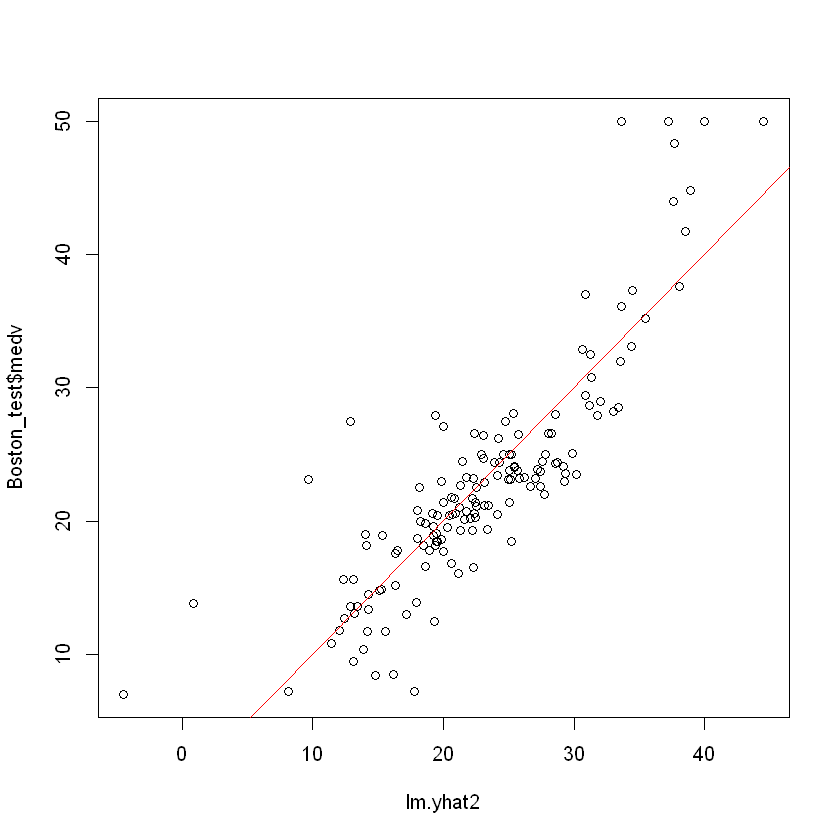

In [147]:
plot(lm.yhat2, Boston_test$medv)
abline(a=0, b=1, col=2)

In [149]:
install.packages('tree')
library(tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15\AppData\Local\Temp\Rtmp6PdMLG\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.3"

In [152]:
tree.fit = tree(medv~.,data=Boston_train)

In [153]:
summary(tree.fit)


Regression tree:
tree(formula = medv ~ ., data = Boston_train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"   "crim"  "nox"  
Number of terminal nodes:  9 
Residual mean deviance:  16.01 = 5523 / 345 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-23.4000  -2.0680  -0.1376   0.0000   2.1380  17.9200 

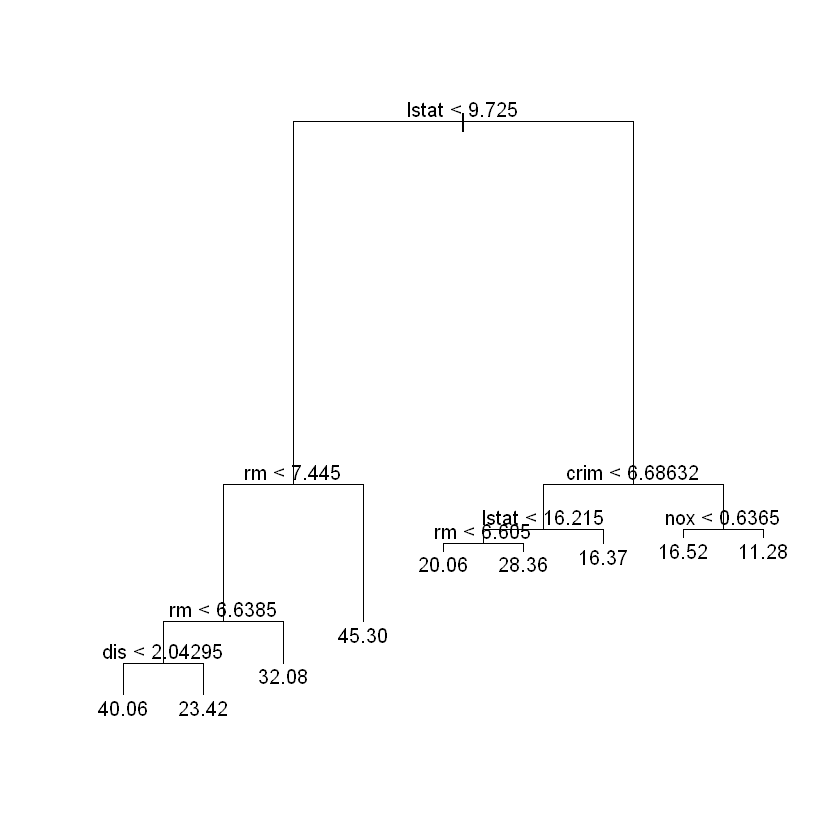

In [156]:
plot(tree.fit)
text(tree.fit, pretty = 0)

In [157]:
tree.yhat = predict(tree.fit, newdata = Boston_test)

In [159]:
kk = mean((tree.yhat - Boston_test$medv)^2)

In [160]:
sqrt(kk)

[1] 4.464572

## rpart 를 통한 의사 결정트리 분석 방법

In [161]:
library(rpart)

In [163]:
rpart.fit = rpart(medv~.,data=Boston_train)
summary(rpart.fit)

Call:
rpart(formula = medv ~ ., data = Boston_train)
  n= 354 

          CP nsplit rel error    xerror       xstd
1 0.46317841      0 1.0000000 1.0132815 0.09641918
2 0.17511916      1 0.5368216 0.6301001 0.06906904
3 0.05774666      2 0.3617024 0.3992560 0.05114722
4 0.05349561      3 0.3039558 0.3631436 0.05166558
5 0.02941044      4 0.2504602 0.3634108 0.05322147
6 0.01770400      5 0.2210497 0.3497887 0.05306159
7 0.01032140      6 0.2033457 0.3175118 0.04991595
8 0.01000000      7 0.1930243 0.3088903 0.04906006

Variable importance
  lstat      rm    crim   indus     nox     age     rad     tax     dis ptratio 
     23      20      14      13      12      10       3       2       2       1 

Node number 1: 354 observations,    complexity param=0.4631784
  mean=22.42542, MSE=90.68218 
  left son=2 (208 obs) right son=3 (146 obs)
  Primary splits:
      lstat   < 9.725    to the right, improve=0.4631784, (0 missing)
      rm      < 6.797    to the left,  improve=0.4615951, (0 missi

In [164]:
library(rpart.plot)

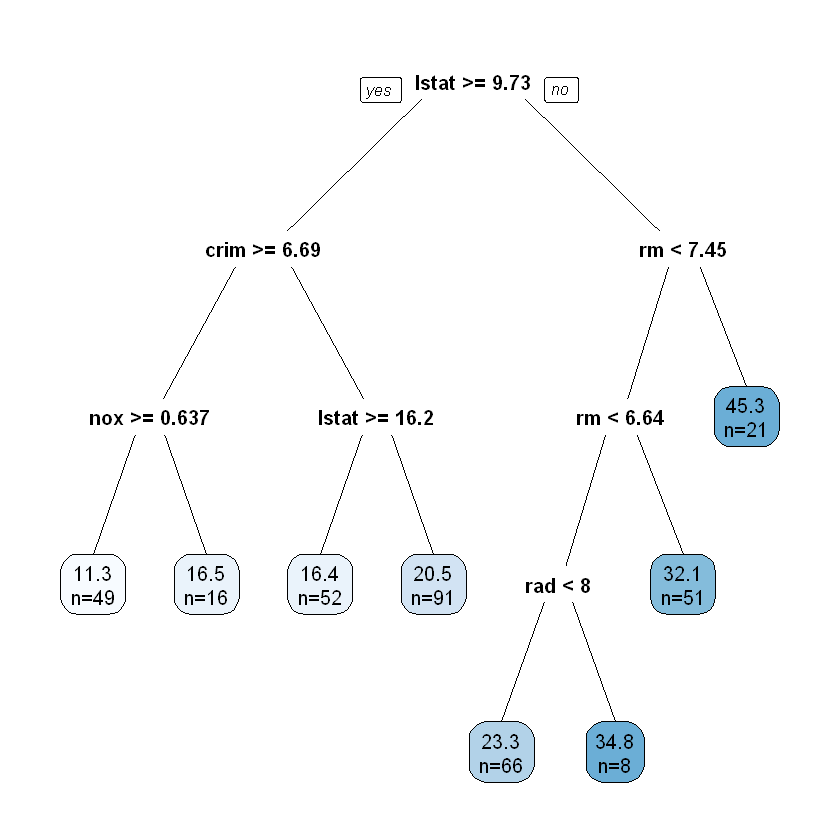

In [167]:
rpart.plot(rpart.fit, digits = 3, type = 0, extra = 1, fallen.leaves = F, cex = 1)

In [169]:
rpart.yhat = predict(rpart.fit, nwedata = Boston_test)

In [172]:
kk = mean((rpart.yhat - Boston_test$medv)^2)

Warning message in rpart.yhat - Boston_test$medv:
"두 객체의 길이가 서로 배수관계에 있지 않습니다"

In [173]:
sqrt(kk)

[1] 11.46987

## ANN 수치예측 모형의 머신러닝알고리즘 방법

In [184]:
normalize = function(x){return((x-min(x))/max(x-min(x)))}

In [185]:
Boston_train_norm = as.data.frame(sapply(Boston_train, normalize))

In [186]:
Boston_test_norm = as.data.frame(sapply(Boston_test, normalize))

In [187]:
library(nnet)

In [189]:
nnet.fit = nnet(medv~.,data=Boston_train_norm, size = 5)

# weights:  76
initial  value 16.786966 
iter  10 value 3.419558
iter  20 value 2.089911
iter  30 value 1.470293
iter  40 value 1.126347
iter  50 value 1.005296
iter  60 value 0.946894
iter  70 value 0.891602
iter  80 value 0.853883
iter  90 value 0.823972
iter 100 value 0.789363
final  value 0.789363 
stopped after 100 iterations


In [195]:
nnet.yhat = predict(nnet.fit, newdata = Boston_test_norm, type = 'raw')

In [197]:
kk = mean((nnet.yhat - Boston_test_norm$medv)^2)

In [198]:
sqrt(kk)

[1] 0.1328344

# ANN의 시각화를 위해서 사용하는 알고리즘 방법

In [200]:
install.packages('neuralnet')
library(neuralnet)

also installing the dependency 'Deriv'



package 'Deriv' successfully unpacked and MD5 sums checked
package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15\AppData\Local\Temp\Rtmp6PdMLG\downloaded_packages


Warning message:
"package 'neuralnet' was built under R version 3.6.3"

In [210]:
neural.fit = neuralnet(medv~crim+zn+indus+chas+nox+rm+age+tax+ptratio+black+lstat,
                       data = Boston_train_norm, hidden=5)

In [211]:
neural.result = compute(neural.fit, Boston_test_norm[1:13])

In [212]:
neural.yhat = neural.result$net.result

In [213]:
kk = mean((neural.yhat = Boston_test_norm$medv)^2)

In [214]:
sqrt(kk)

[1] 0.4152609

In [215]:
plot(neural.fit)

# RF model(앙상블) Method 수치머신러닝

In [216]:
library(randomForest)

In [217]:
set.seed(1)
rf.fit = randomForest(medv~.,data = Boston_train, mtry = 6, importance = T)

In [218]:
rf.fit


Call:
 randomForest(formula = medv ~ ., data = Boston_train, mtry = 6,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 11.54506
                    % Var explained: 87.27

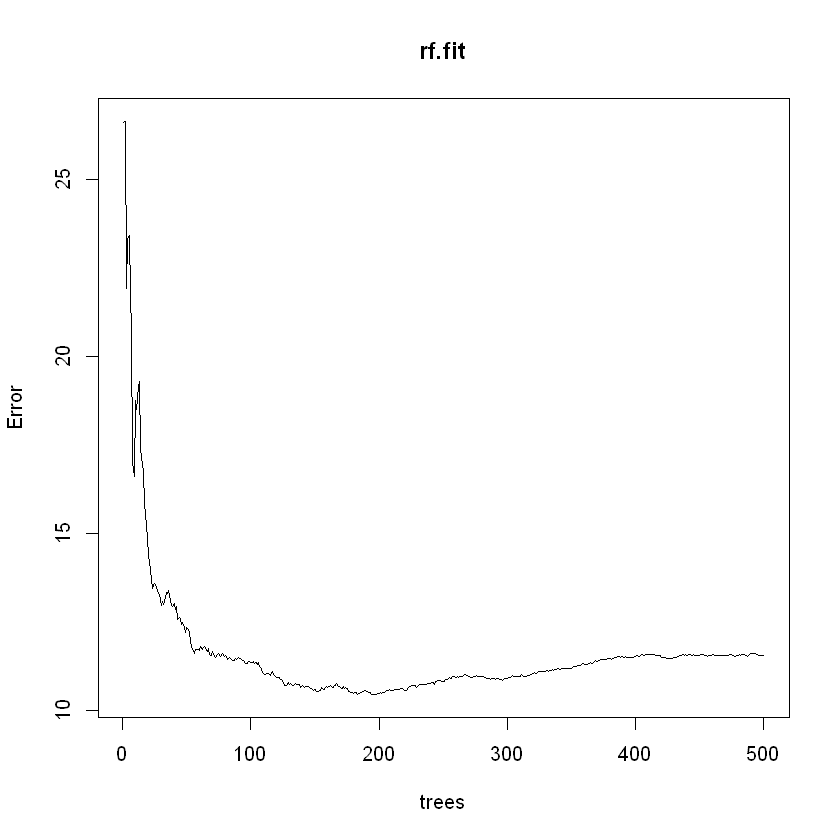

In [219]:
plot(rf.fit)

In [220]:
importance(rf.fit)

,%IncMSE,IncNodePurity
crim,15.354201,1679.55775
zn,2.725179,140.22757
indus,11.727265,1785.88581
chas,2.911793,78.84189
nox,15.676355,1323.70238
rm,38.311365,10396.88312
age,12.792631,766.53926
dis,18.739419,2071.97170
rad,6.124113,183.62235
tax,10.833208,748.20436


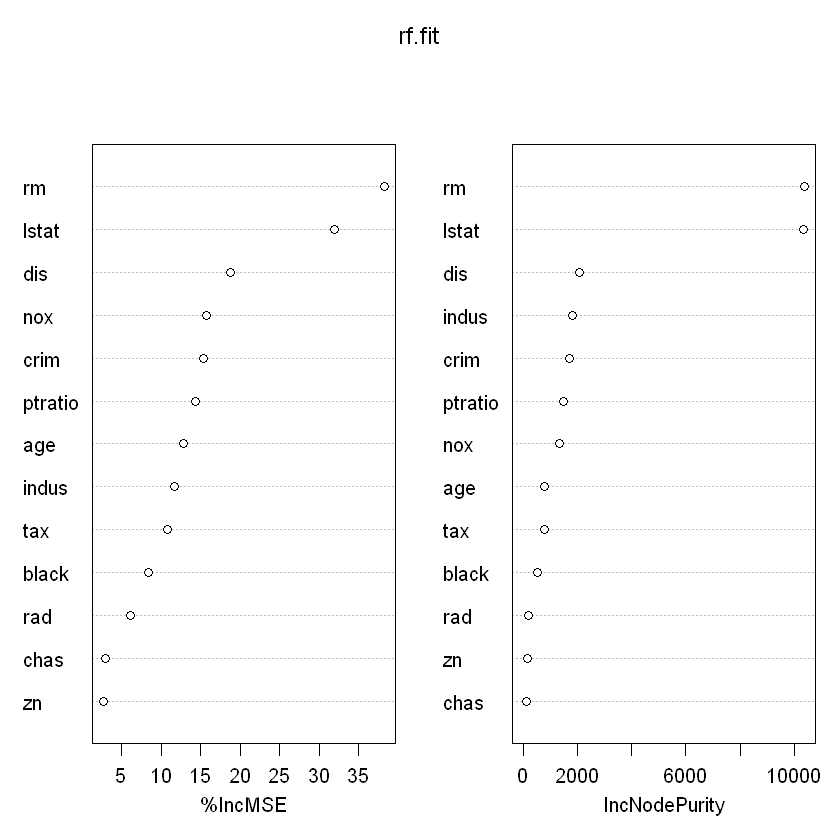

In [224]:
varImpPlot(rf.fit)

In [225]:
rf.yhat = predict(rf.fit, nwedata = Boston_test)

In [230]:
kk = mean((rf.yhat - Boston_test$medv)^2)

Warning message in rf.yhat - Boston_test$medv:
"두 객체의 길이가 서로 배수관계에 있지 않습니다"

In [231]:
sqrt(kk)

[1] 11.25393

# 자율학습 모델(unsupervised Model)
## K - means Model method

In [232]:
iris2 = iris[,1:4]
iris2

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


In [233]:
km.out.withness = c()
km.out.between = c()

In [239]:
for (i in 2:7){
    set.seed(1)
            km.out = kmeans(iris2, center = i)
            km.out.withness[i-1] = km.out$tot.withinss
            km.out.between[i-1] = km.out$betweenss
}
tt = data.frame(km.out.withness, km.out.between)

Warning message in plot.window(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.window(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""kk"는 그래픽 매개변수가 아닙니다"

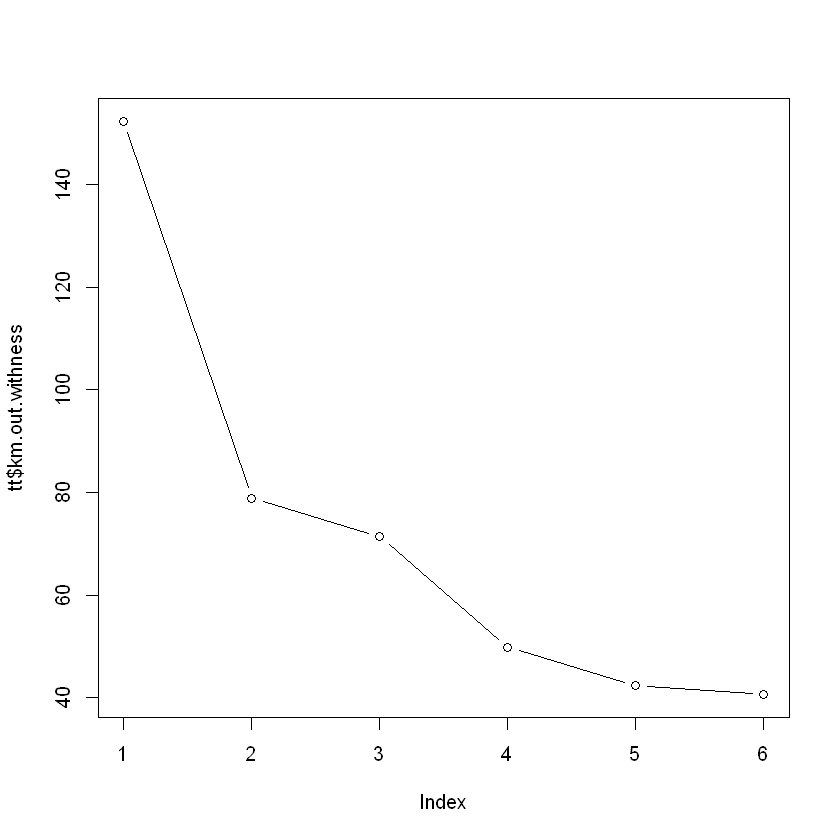

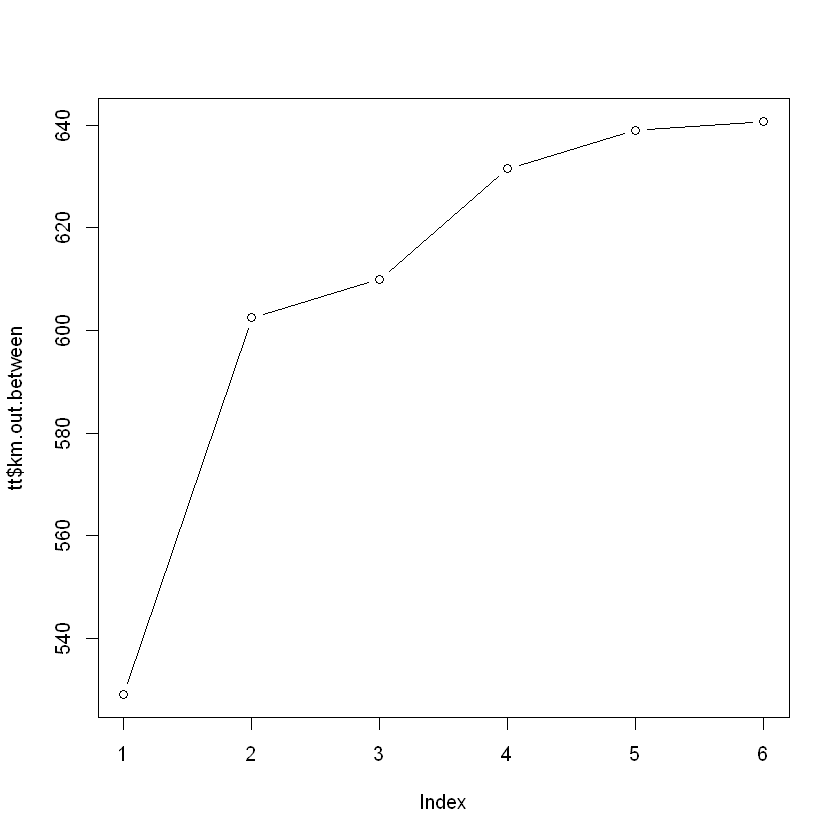

In [257]:
plot(kk = c(1:7), tt$km.out.withness, type = 'b')
plot(kk=c(1:7), tt$km.out.between, type = 'b')

In [246]:
km.out.k3 = kmeans(iris2, centers = 3)
km.out.k3$centers
km.out.k3$cluster

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
6.850000,3.073684,5.742105,2.071053
5.901613,2.748387,4.393548,1.433871
5.006000,3.428000,1.462000,0.246000


[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

In [247]:
km.out.k3$size

[1] 38 62 50

In [248]:
table(km.out.k3$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


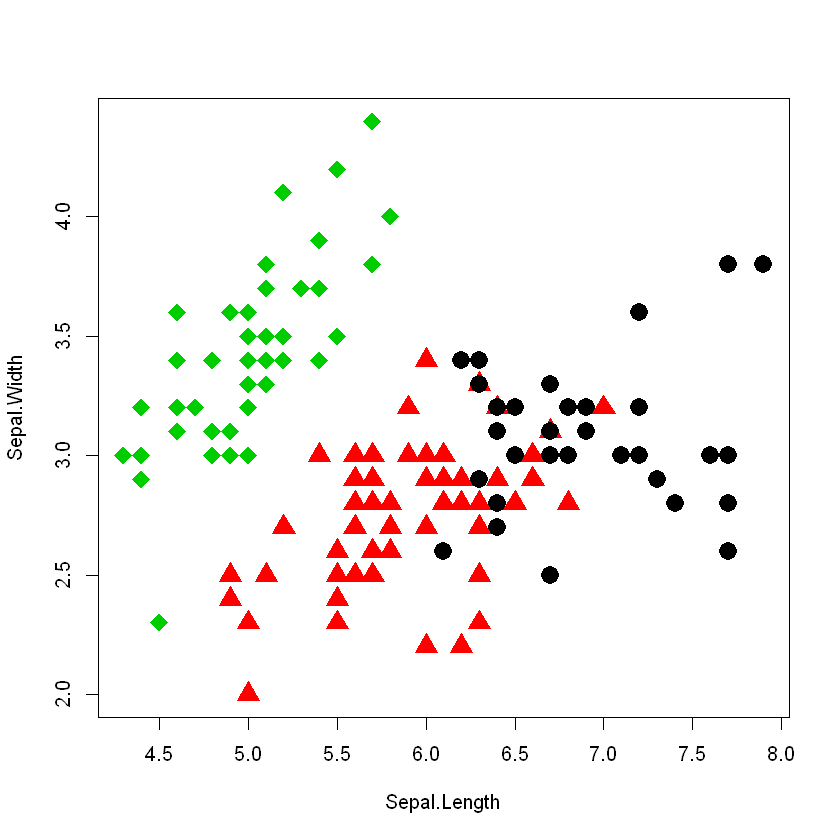

In [256]:
plot(iris2[,1:2], col = km.out.k3$cluster, pch = ifelse(km.out.k3$cluster == 1, 16,
                                                       ifelse(km.out.k3$cluster == 2, 17, 18)),
    cex = 2)
points(km.out.k3$centers, col = 1:3, pch = 16, 17, 18, cex = 5)

In [258]:
USArrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [265]:
pc1 = princomp(USArrests, cor = T)

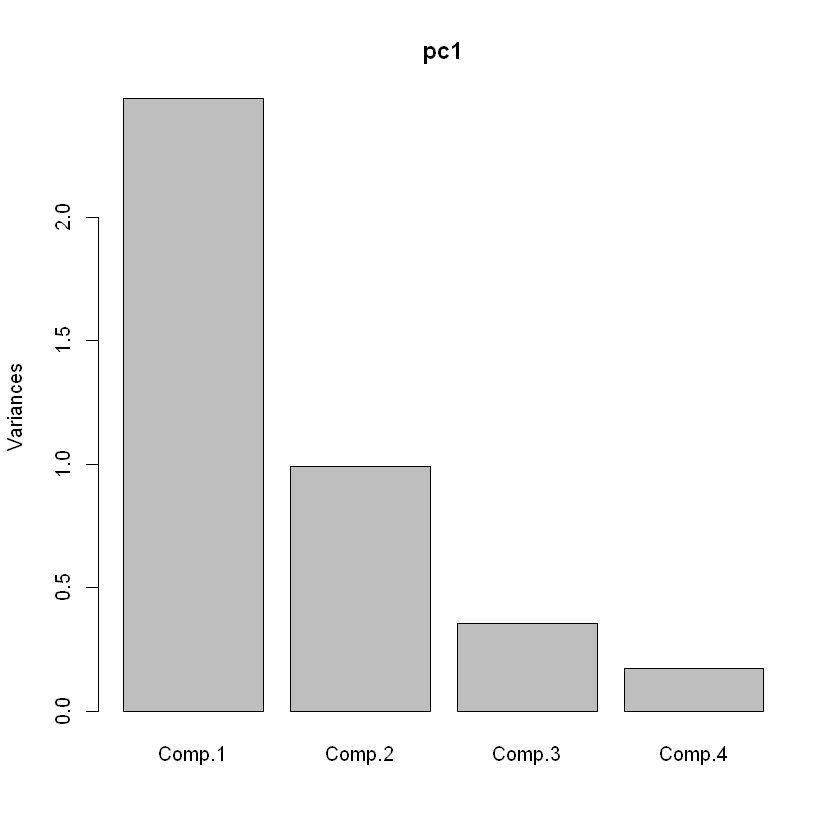

In [266]:
plot(pc1)

In [267]:
summary(pc1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

In [270]:
pc1$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [269]:
pc1$scale

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

In [271]:
pc1$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [273]:
pc1$scores

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


Warning message in plot.window(...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in plot.window(...):
""ylabel"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""ylabel"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""ylabel"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""ylabel"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""ylabel"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""xlabel"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""ylabel"는 그래픽 매개변수가 아닙니다"

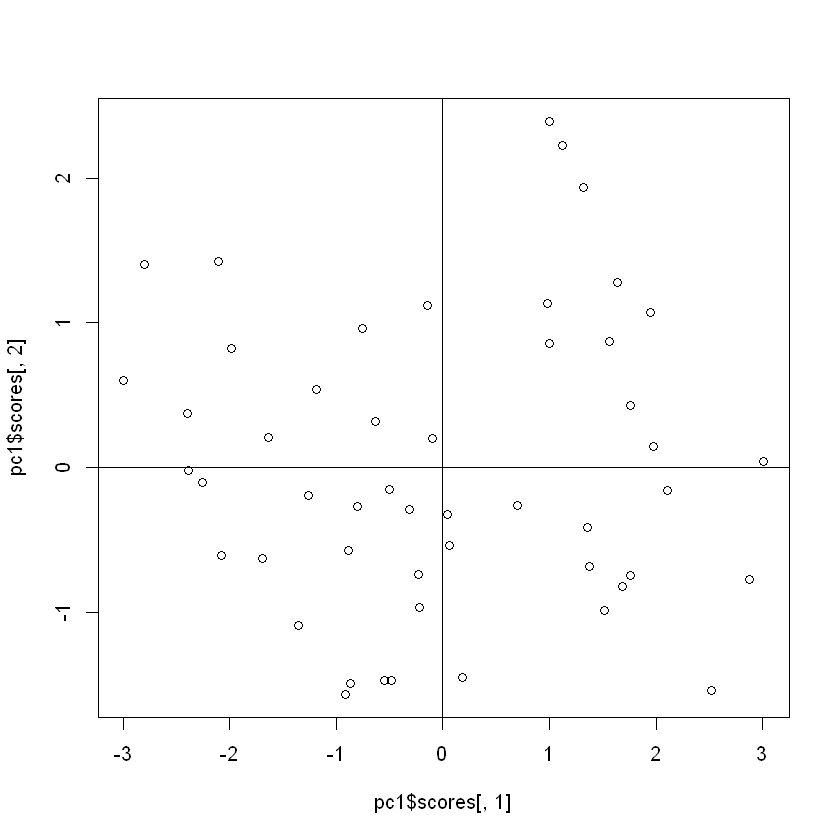

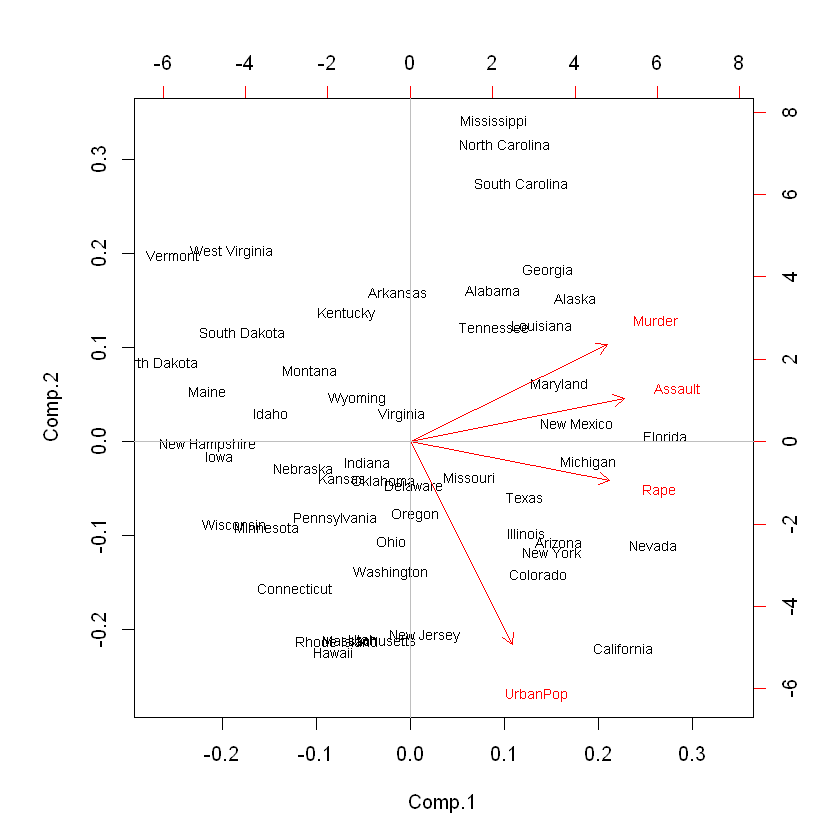

In [276]:
plot(pc1$scores[,1], pc1$scores[,2], xlabel = 'z1', ylabel = 'z2')
abline(v = 0, h =0)
biplot(pc1, cex = 0.7)
abline(v=0, h=0, col='gray')